### Importing Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Reading data

In [2]:
data = pd.read_csv('housing.csv')

### Visualizing and Cleaning Data

In [3]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
data =  data.join(pd.get_dummies(data.ocean_proximity, dtype = int))

In [5]:
data.drop(['ocean_proximity'], axis = 1,inplace = True)

In [6]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


In [7]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
<1H OCEAN               0
INLAND                  0
ISLAND                  0
NEAR BAY                0
NEAR OCEAN              0
dtype: int64

In [8]:
data.dropna(inplace = True)

In [9]:
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
<1H OCEAN             0
INLAND                0
ISLAND                0
NEAR BAY              0
NEAR OCEAN            0
dtype: int64

In [10]:
data.shape

(20433, 14)

In [11]:
from sklearn.model_selection import train_test_split

y = data.pop('median_house_value')
X = data

In [12]:
y = y.to_frame()

In [13]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,0,0,0,1,0


In [14]:
y.head()

,median_house_value
0,452600.0
1,358500.0
2,352100.0
3,341300.0
4,342200.0


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) 

In [16]:
train_data = X_train.join(y_train)

In [17]:
train_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_house_value
12504,-121.44,38.56,45.0,2423.0,466.0,873.0,438.0,3.7167,0,1,0,0,0,131900.0
17961,-121.98,37.31,28.0,3840.0,629.0,1883.0,662.0,6.4095,1,0,0,0,0,335900.0
15368,-117.17,33.28,16.0,1921.0,312.0,862.0,280.0,5.1786,1,0,0,0,0,376800.0
7723,-118.12,33.94,33.0,2206.0,393.0,973.0,364.0,4.6750,1,0,0,0,0,283000.0
20242,-119.23,34.27,29.0,3298.0,804.0,1509.0,711.0,3.8125,0,0,0,0,1,244500.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>,
        <Axes: title={'center': 'total_rooms'}>],
       [<Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>,
        <Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>],
       [<Axes: title={'center': '<1H OCEAN'}>,
        <Axes: title={'center': 'INLAND'}>,
        <Axes: title={'center': 'ISLAND'}>,
        <Axes: title={'center': 'NEAR BAY'}>],
       [<Axes: title={'center': 'NEAR OCEAN'}>,
        <Axes: title={'center': 'median_house_value'}>, <Axes: >,
        <Axes: >]], dtype=object)

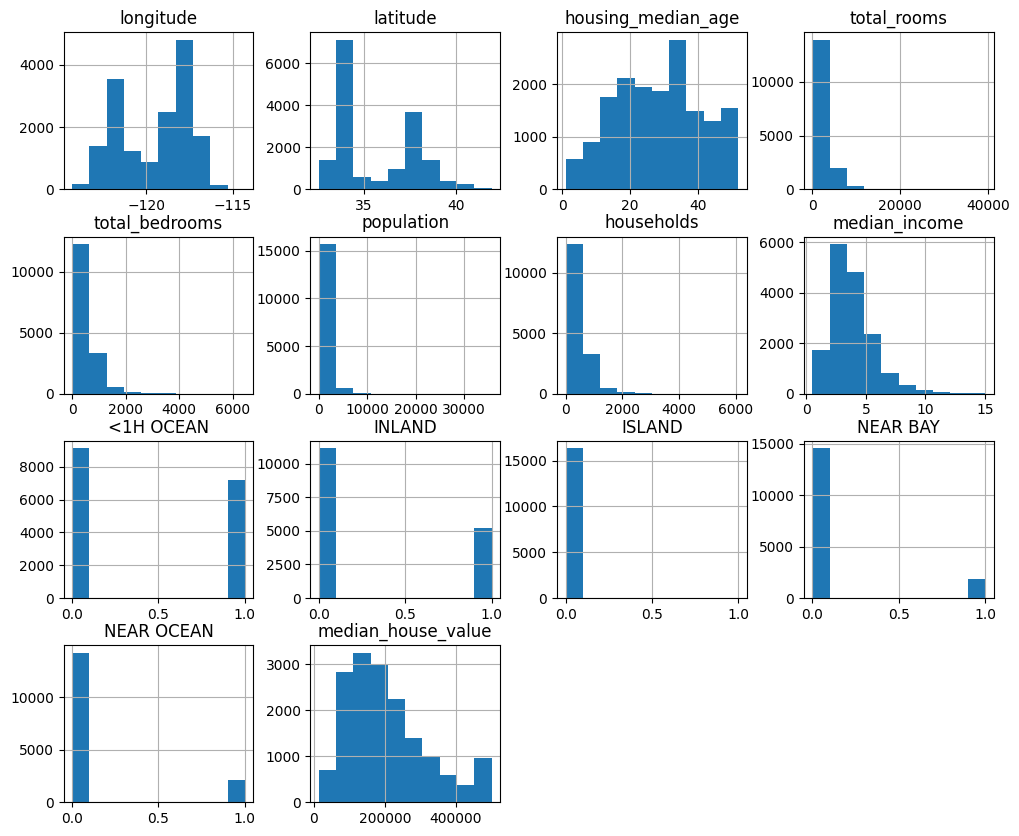

In [18]:
train_data.hist(figsize = (12, 10))

In [19]:
corr = train_data.corr()

<Axes: >

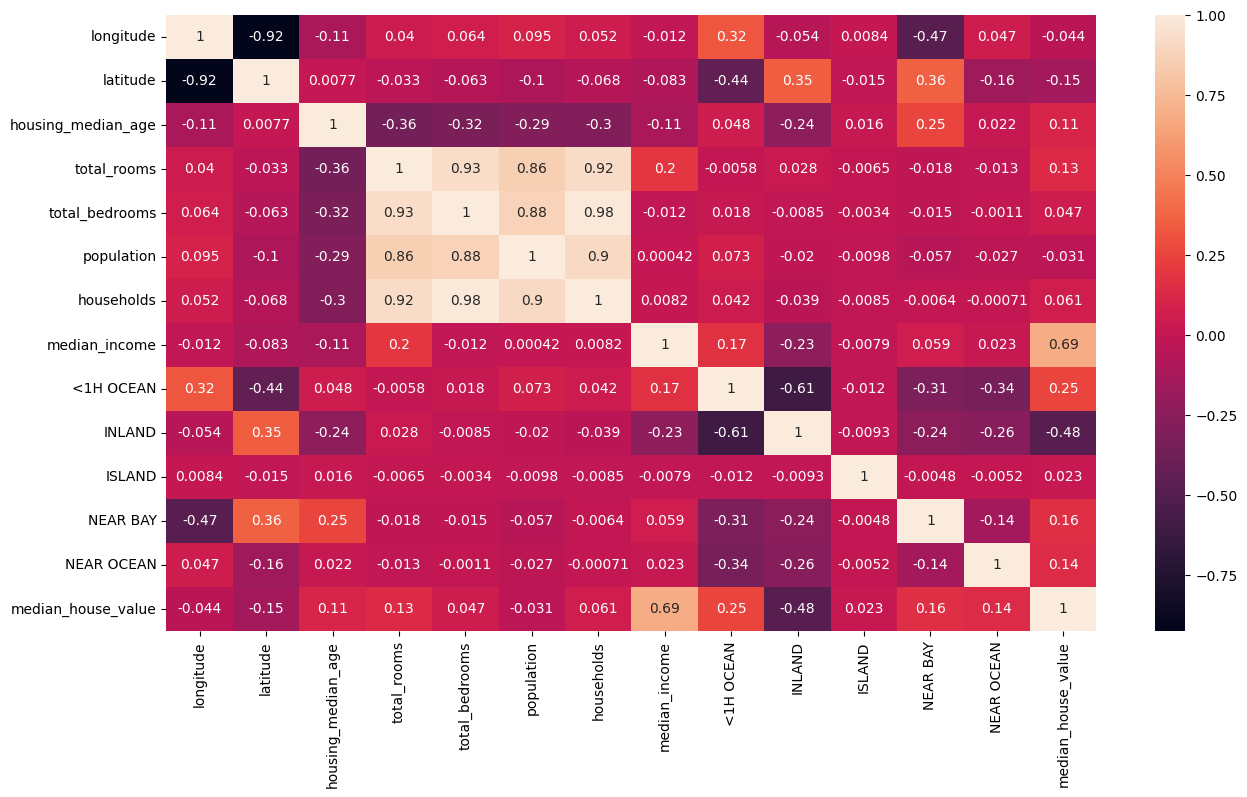

In [20]:
plt.figure(figsize = (15, 8))
sns.heatmap(corr, annot = True)

<Axes: xlabel='latitude', ylabel='longitude'>

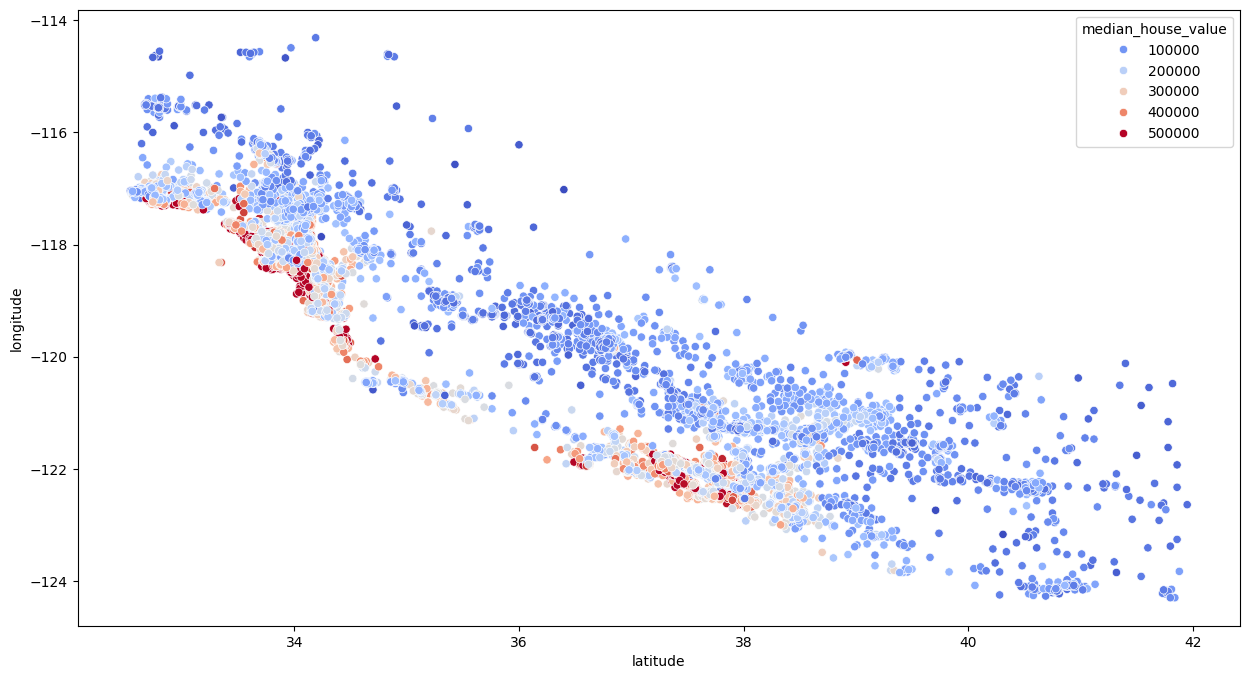

In [21]:
plt.figure(figsize = (15, 8))
sns.scatterplot(x = 'latitude', y = 'longitude', data = train_data, hue = "median_house_value", palette = "coolwarm")

### Fitting into Linear-Regression Model

In [22]:
from sklearn.linear_model import LinearRegression

X_train, y_train = train_data.drop(['median_house_value'], axis = 1), train_data['median_house_value']

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [23]:
reg.score(X_test, y_test)

0.6536212002050408

### Trying Ridge and Lasso

In [24]:
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [25]:
ridge_model = make_pipeline(StandardScaler(), RidgeCV(alphas = [0.1, 1, 10], cv = 5))
ridge_model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('ridgecv', RidgeCV(alphas=[0.1, 1, 10], cv=5))])

In [26]:
ridge_model.score(X_test, y_test)

0.6537006161918548

In [27]:
lasso_model = make_pipeline(StandardScaler(), LassoCV(alphas = [0.1, 1, 10], cv = 5, max_iter = 10000))
lasso_model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lassocv',
                 LassoCV(alphas=[0.1, 1, 10], cv=5, max_iter=10000))])

In [28]:
lasso_model.score(X_test, y_test)

0.6536295105395298

### Trying Random-Forest

In [29]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train, y_train)
forest.score(X_test, y_test)

0.8274260967343648